In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error



In [3]:
df = pd.read_csv('DatosParaCompartir.csv')
df.head()

,t,CSI,GHI,Presion,TempAmb,Wind Y,Wind X,DoY Sin,DoY Cos,horas
0,2022-02-21 18:00:00+00:00,2.0,3.0352,1000.7912,29.9672,2.832954,-0.093612,0.778764,0.627317,18
1,2022-02-21 18:10:00+00:00,0.0,0.3562,1000.9321,29.5689,3.387552,0.796801,0.778764,0.627317,18
2,2022-02-21 18:20:00+00:00,0.0,0.0000,1001.1479,29.2593,2.091197,-0.878680,0.778764,0.627317,18
3,2022-02-21 18:30:00+00:00,0.0,0.0000,1001.2992,28.9183,-0.487957,-1.478562,0.778764,0.627317,18
4,2022-02-21 18:40:00+00:00,0.0,0.0000,1001.4676,28.5578,0.891171,-2.047462,0.778764,0.627317,18


In [4]:
columns = ['t','GHI']
df = df[columns]
df = df.reset_index(drop=True)
df.rename(columns={'t': 'ds', 'GHI': 'y'}, inplace=True)
df['ds'] = pd.to_datetime(df['ds']).dt.tz_localize(None)

df.head()

,ds,y
0,2022-02-21 18:00:00,3.0352
1,2022-02-21 18:10:00,0.3562
2,2022-02-21 18:20:00,0.0000
3,2022-02-21 18:30:00,0.0000
4,2022-02-21 18:40:00,0.0000


In [5]:
df['ds'] = pd.to_datetime(df['ds'])

fecha_inicio = '2023-01-01'
fecha_fin = '2023-03-31'
fecha_inicio_test = '2023-04-01'
fecha_fin_test = '2023-04-30'

train_set = df[(df['ds'] >= fecha_inicio) & (df['ds'] <= fecha_fin)]
test_set = df[(df['ds'] >= fecha_inicio_test) & (df['ds'] <= fecha_fin_test)]

train_set = train_set[(train_set['ds'].dt.time >= pd.to_datetime('05:00').time()) &
                      (train_set['ds'].dt.time <= pd.to_datetime('18:30').time())]
test_set = test_set[(test_set['ds'].dt.time >= pd.to_datetime('05:00').time()) &
                    (test_set['ds'].dt.time <= pd.to_datetime('18:30').time())]

train_set.head(), test_set.head()



(                       ds    y
 45138 2023-01-01 05:00:00  0.0
 45139 2023-01-01 05:10:00  0.0
 45140 2023-01-01 05:20:00  0.0
 45141 2023-01-01 05:30:00  0.0
 45142 2023-01-01 05:40:00  0.0,
                        ds       y
 58098 2023-04-01 05:00:00  0.0592
 58099 2023-04-01 05:10:00  0.0601
 58100 2023-04-01 05:20:00  0.0610
 58101 2023-04-01 05:30:00  0.0620
 58102 2023-04-01 05:40:00  1.1658)

In [6]:
print(test_set['ds'].head(30))


58098   2023-04-01 05:00:00
58099   2023-04-01 05:10:00
58100   2023-04-01 05:20:00
58101   2023-04-01 05:30:00
58102   2023-04-01 05:40:00
58103   2023-04-01 05:50:00
58104   2023-04-01 06:00:00
58105   2023-04-01 06:10:00
58106   2023-04-01 06:20:00
58107   2023-04-01 06:30:00
58108   2023-04-01 06:40:00
58109   2023-04-01 06:50:00
58110   2023-04-01 07:00:00
58111   2023-04-01 07:10:00
58112   2023-04-01 07:20:00
58113   2023-04-01 07:30:00
58114   2023-04-01 07:40:00
58115   2023-04-01 07:50:00
58116   2023-04-01 08:00:00
58117   2023-04-01 08:10:00
58118   2023-04-01 08:20:00
58119   2023-04-01 08:30:00
58120   2023-04-01 08:40:00
58121   2023-04-01 08:50:00
58122   2023-04-01 09:00:00
58123   2023-04-01 09:10:00
58124   2023-04-01 09:20:00
58125   2023-04-01 09:30:00
58126   2023-04-01 09:40:00
58127   2023-04-01 09:50:00
Name: ds, dtype: datetime64[ns]


In [7]:
m = Prophet()
m.fit(train_set)

15:14:33 - cmdstanpy - INFO - Chain [1] start processing
15:14:36 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future = test_set[['ds']].copy() 
future.head()

,ds
58098,2023-04-01 05:00:00
58099,2023-04-01 05:10:00
58100,2023-04-01 05:20:00
58101,2023-04-01 05:30:00
58102,2023-04-01 05:40:00


In [9]:
len(future)

2378

In [10]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()


,ds,yhat,yhat_lower,yhat_upper
0,2023-04-01 05:00:00,49.536222,-115.075511,214.458364
1,2023-04-01 05:10:00,36.311735,-137.982729,224.908345
2,2023-04-01 05:20:00,27.738088,-151.904168,210.814903
3,2023-04-01 05:30:00,23.783436,-149.767089,187.455803
4,2023-04-01 05:40:00,24.372273,-151.875778,201.983956


In [11]:
len(forecast)

2378

In [12]:
from sklearn.preprocessing import MinMaxScaler


forecast = forecast[['ds', 'yhat']]
test_set = test_set.merge(forecast, on='ds')

scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(test_set[['y', 'yhat']])

scaled_y = scaled_values[:, 0]  # Valores reales escalados
scaled_yhat = scaled_values[:, 1]  # Predicciones escaladas

mse = mean_squared_error(scaled_y, scaled_yhat)
print(f"Mean Squared Error (MSE) (Escalado): {mse:.4f}")


Mean Squared Error (MSE) (Escalado): 0.0576


In [13]:
x = test_set[['y']]
real = test_set[['ds']]
predict = forecast[['ds','yhat']]
predict_subset = predict[predict['ds'].isin(real['ds'])]
predict_subset = predict_subset[['yhat']]
predict_subset = forecast[['ds', 'yhat']]

predict_subset.head()
#len(predict_subset)


,ds,yhat
0,2023-04-01 05:00:00,49.536222
1,2023-04-01 05:10:00,36.311735
2,2023-04-01 05:20:00,27.738088
3,2023-04-01 05:30:00,23.783436
4,2023-04-01 05:40:00,24.372273


In [14]:
test_set_filtered = test_set[test_set['ds'].isin(forecast['ds'])]
test_set_filtered.head()
#len(test_set_filtered)

,ds,y,yhat
0,2023-04-01 05:00:00,0.0592,49.536222
1,2023-04-01 05:10:00,0.0601,36.311735
2,2023-04-01 05:20:00,0.0610,27.738088
3,2023-04-01 05:30:00,0.0620,23.783436
4,2023-04-01 05:40:00,1.1658,24.372273


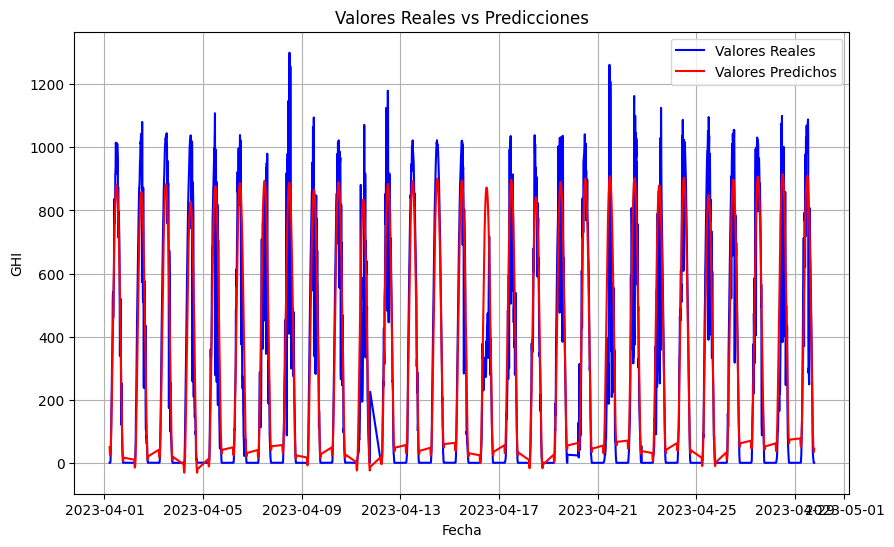

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(test_set_filtered['ds'], test_set_filtered['y'], label='Valores Reales', color='blue')
plt.plot(predict_subset['ds'], predict_subset['yhat'], label='Valores Predichos', color='red')
plt.title('Valores Reales vs Predicciones')
plt.xlabel('Fecha')
plt.ylabel('GHI')
plt.legend()
plt.grid(True)
plt.show()


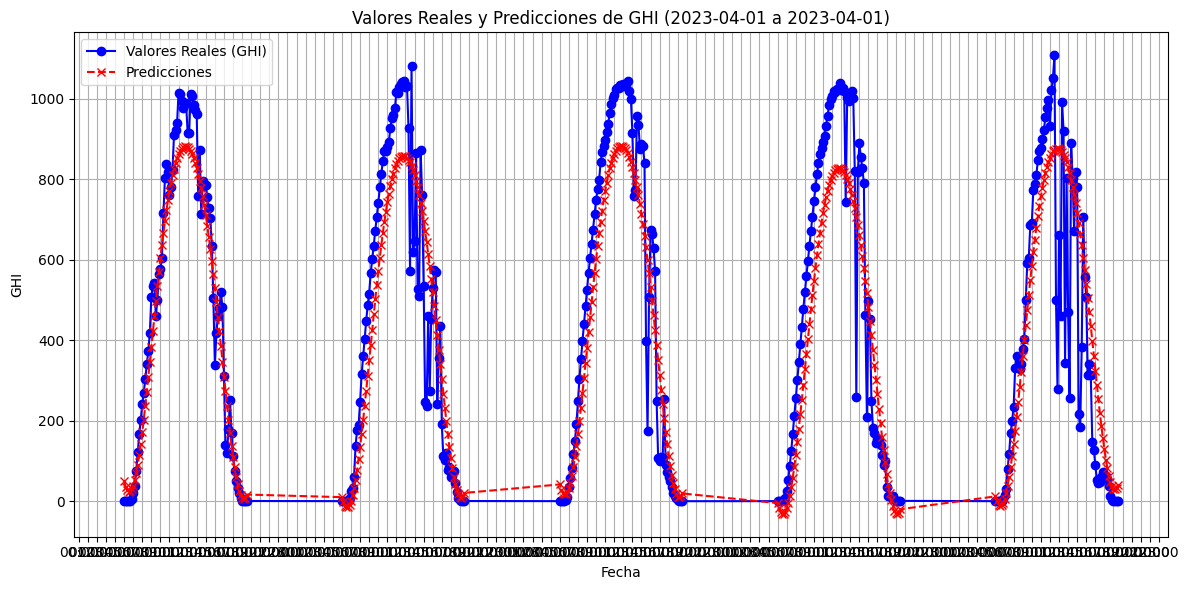

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define el rango de fechas para filtrar
start_date = '2023-04-01 05:00:00'  # Inicio deseado
end_date = '2023-04-05 18:30:00'    # Fin deseado

# Filtra los datos según el rango de fechas
test_set_filtered_date = test_set_filtered[(test_set_filtered['ds'] >= start_date) & (test_set_filtered['ds'] <= end_date)]
predict_subset_date = predict_subset[(predict_subset['ds'] >= start_date) & (predict_subset['ds'] <= end_date)]

real_values = test_set_filtered_date['y'].values
predicted_values = predict_subset_date['yhat'].values
mae = mean_absolute_error(real_values, predicted_values)

# Configura el gráfico
plt.figure(figsize=(12, 6))
plt.plot(test_set_filtered_date['ds'], test_set_filtered_date['y'], label='Valores Reales (GHI)', color='blue', marker='o', linestyle='-')
plt.plot(predict_subset_date['ds'], predict_subset_date['yhat'], label='Predicciones', color='red', marker='x', linestyle='--')

# Formato del título y etiquetas del eje X
plt.title(f'Valores Reales y Predicciones de GHI (2023-04-01 a 2023-04-01)')
plt.xlabel('Fecha')
plt.ylabel('GHI')

# Configuración del formato de fechas en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Formato de horas en el eje X
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Intervalo de horas

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Mean Absolute Error (MAE): 21740.5288


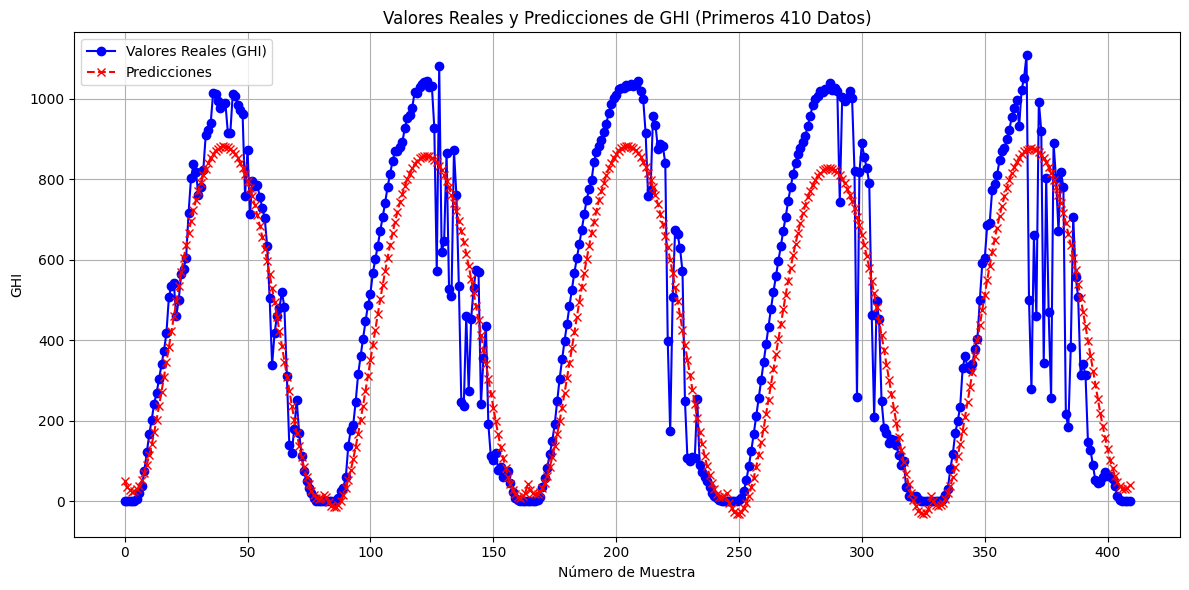

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

def plot_ghi_by_sample_count(test_set_filtered, predict_subset, sample_count):
    """
    Grafica valores reales y predicciones de GHI usando índices de muestra en el eje X.
    
    Args:
        test_set_filtered (DataFrame): Conjunto de prueba con columnas 'ds' y 'y'.
        predict_subset (DataFrame): Predicciones del modelo con columnas 'ds' y 'yhat'.
        sample_count (int): Cantidad de muestras a graficar desde el inicio.
    """
    # Filtrar por cantidad de datos
    test_set_filtered_data = test_set_filtered.head(sample_count)
    predict_subset_data = predict_subset.head(sample_count)
    
    # Obtener valores reales y predichos
    real_values = test_set_filtered_data['y'].values
    predicted_values = predict_subset_data['yhat'].values
    
    # Calcular el MAE
    mae = mean_squared_error(real_values, predicted_values)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    
    # Configurar el gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(real_values)), real_values, label='Valores Reales (GHI)', color='blue', marker='o', linestyle='-')
    plt.plot(range(len(predicted_values)), predicted_values, label='Predicciones', color='red', marker='x', linestyle='--')
    
    # Títulos y etiquetas
    plt.title(f'Valores Reales y Predicciones de GHI (Primeros {sample_count} Datos)')
    plt.xlabel('Número de Muestra')
    plt.ylabel('GHI')
    
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_ghi_by_sample_count(test_set_filtered, predict_subset, sample_count=410)



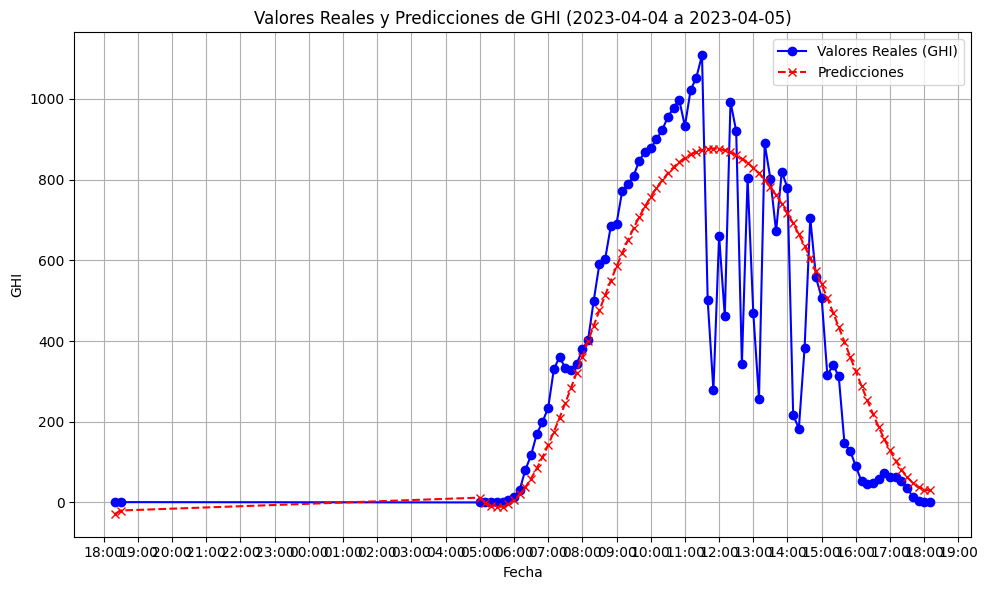

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Función para graficar `salida_original` y `predicciones` contra la columna `fechas` en una ventana de tiempo específica
def graficar_valores_contra_fecha(df, columna_valores, columna_predicciones, inicio, fin):
    # Seleccionar el rango de muestras deseadas según el índice de inicio y fin
    df_filtrado = df.iloc[inicio:fin].copy()
    df_filtrado['ds'] = pd.to_datetime(df_filtrado['ds'], format='%Y-%m-%d %H:%M:%S')

    mae = mean_absolute_error(df_filtrado[columna_valores], df_filtrado[columna_predicciones])

    # Obtener la fecha inicial y final para el título
    fecha_inicio = df_filtrado['ds'].iloc[0].strftime('%Y-%m-%d')
    fecha_fin = df_filtrado['ds'].iloc[-1].strftime('%Y-%m-%d')

    # Graficar los valores reales y las predicciones usando la columna `fechas` en el eje x
    plt.figure(figsize=(10, 6))
    plt.plot(df_filtrado['ds'], df_filtrado[columna_valores], label="Valores Reales (GHI)", color='blue', marker='o')
    plt.plot(df_filtrado['ds'], df_filtrado[columna_predicciones], label="Predicciones", color='red', linestyle='--', marker='x')
    
    # Configurar el formato de fecha en el eje x
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
    
    # Personalización adicional
    plt.grid(linestyle='-') 
    plt.xlabel("Fecha")
    plt.ylabel("GHI")
    plt.title(f"Valores Reales y Predicciones de GHI ({fecha_inicio} a {fecha_fin})")
    plt.legend()
    plt.tight_layout()
    plt.show()

# Ejemplo de uso
inicio = 326  # Especifica aquí el índice de inicio
fin = 326+82     # Especifica aquí el índice de fin
graficar_valores_contra_fecha(test_set_filtered, columna_valores='y', columna_predicciones='yhat', inicio=inicio, fin=fin)


